In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [369]:
df=pd.read_csv('/Users/dftehada/Downloads/house-price-train.csv')

In [370]:
## Descriptive stats for each column in the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [340]:
#Null Values per column
null_values=df.isnull().sum()/len(df)
null_values

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [341]:
## Columns where null values are greater than 60%
null_values.loc[null_values.values>.6]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

# Part 1a: Generating a Data Quality Report

Process: Separate numerical columns from categorical and create a matrix that captures metrics of central tendency and variation using pandas functions for both data types.

In [342]:
def numerical_report(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_matrix = pd.DataFrame({
        'Count': df[numerical_cols].count(),
        '% Missing Values': df[numerical_cols].isnull().mean().round(4) * 100,
        'Cardinality': df[numerical_cols].nunique(),
        'Minimum': df[numerical_cols].min(),
        '1st Quartile': df[numerical_cols].quantile(0.25),
        'Mean': df[numerical_cols].mean().round(2),
        'Median': df[numerical_cols].median(),
        '3rd Quartile': df[numerical_cols].quantile(0.75),
        'Maximum': df[numerical_cols].max(),
        'Standard Deviation': df[numerical_cols].std().round(2)
    })
    return numerical_matrix

In [343]:
dqr_numerical=numerical_report(df)
dqr_numerical

,Count,% Missing Values,Cardinality,Minimum,1st Quartile,Mean,Median,3rd Quartile,Maximum,Standard Deviation
Id,1460,0.00,1460,1.0,365.75,730.50,730.5,1095.25,1460.0,421.61
MSSubClass,1460,0.00,15,20.0,20.00,56.90,50.0,70.00,190.0,42.30
LotFrontage,1201,17.74,110,21.0,59.00,70.05,69.0,80.00,313.0,24.28
LotArea,1460,0.00,1073,1300.0,7553.50,10516.83,9478.5,11601.50,215245.0,9981.26
OverallQual,1460,0.00,10,1.0,5.00,6.10,6.0,7.00,10.0,1.38
OverallCond,1460,0.00,9,1.0,5.00,5.58,5.0,6.00,9.0,1.11
YearBuilt,1460,0.00,112,1872.0,1954.00,1971.27,1973.0,2000.00,2010.0,30.20
YearRemodAdd,1460,0.00,61,1950.0,1967.00,1984.87,1994.0,2004.00,2010.0,20.65
MasVnrArea,1452,0.55,327,0.0,0.00,103.69,0.0,166.00,1600.0,181.07
BsmtFinSF1,1460,0.00,637,0.0,0.00,443.64,383.5,712.25,5644.0,456.10


In [344]:
def categorical_report(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_matrix = pd.DataFrame({
       'Count': df[categorical_cols].count(),
        '% Missing Values': df[categorical_cols].isnull().mean().round(4) * 100,
        'Cardinality': df[categorical_cols].nunique(),
        'Mode': df[categorical_cols].mode().iloc[0],
        'Mode Frequency': df[categorical_cols].apply(lambda x: x.value_counts().iloc[0] if not x.value_counts().empty else np.nan),
        'Mode %': df[categorical_cols].apply(lambda x: (x.value_counts().iloc[0] / len(x)) * 100 if not x.value_counts().empty else np.nan).round(2),
        '2nd Mode': df[categorical_cols].apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else np.nan),
        '2nd Mode Frequency': df[categorical_cols].apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else np.nan),
        '2nd Mode %': df[categorical_cols].apply(lambda x: (x.value_counts().iloc[1] / len(x)) * 100 if len(x.value_counts()) > 1 else np.nan).round(2)
    })
    return categorical_matrix

In [345]:
dqr_categorical=categorical_report(df)
dqr_categorical

,Count,% Missing Values,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
MSZoning,1460,0.00,5,RL,1151,78.84,RM,218,14.93
Street,1460,0.00,2,Pave,1454,99.59,Grvl,6,0.41
Alley,91,93.77,2,Grvl,50,3.42,Pave,41,2.81
LotShape,1460,0.00,4,Reg,925,63.36,IR1,484,33.15
LandContour,1460,0.00,4,Lvl,1311,89.79,Bnk,63,4.32
Utilities,1460,0.00,2,AllPub,1459,99.93,NoSeWa,1,0.07
LotConfig,1460,0.00,5,Inside,1052,72.05,Corner,263,18.01
LandSlope,1460,0.00,3,Gtl,1382,94.66,Mod,65,4.45
Neighborhood,1460,0.00,25,NAmes,225,15.41,CollgCr,150,10.27
Condition1,1460,0.00,9,Norm,1260,86.30,Feedr,81,5.55


# Part 1b: Generating Visualizations for Numerical and Categorical Data

In [346]:
import matplotlib.pyplot as plt

Numerical Data Visualizations

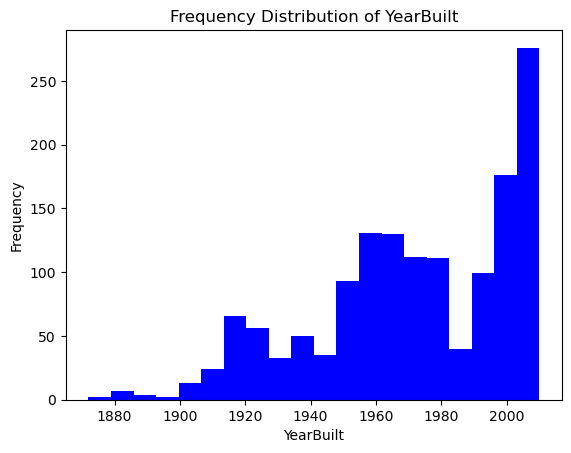

In [347]:
plt.hist(df['YearBuilt'], bins=20, color='blue')
plt.title('Frequency Distribution of YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Frequency')
plt.show()

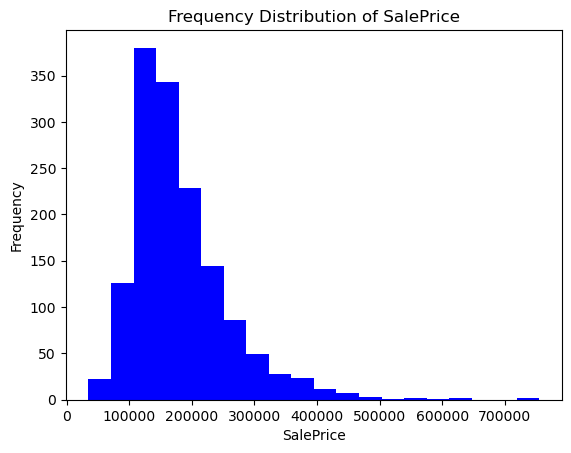

In [348]:
plt.hist(df['SalePrice'], bins=20, color='blue')
plt.title('Frequency Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [349]:
fullbath_counts=df.FullBath.value_counts()

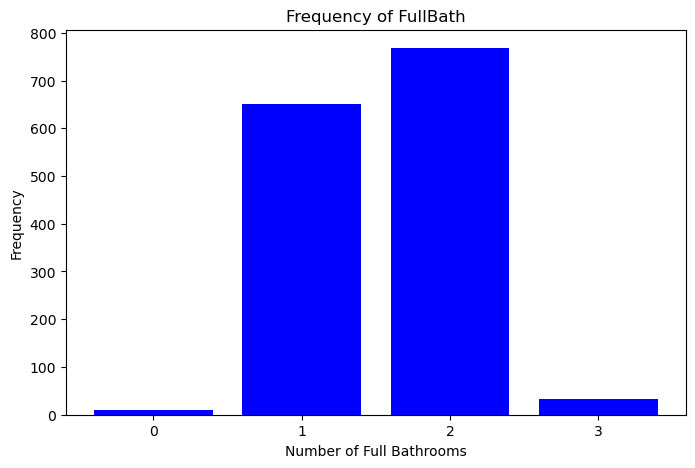

In [350]:
plt.figure(figsize=(8, 5))
plt.bar(fullbath_counts.index, fullbath_counts.values, color='blue')
plt.title('Frequency of FullBath')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Frequency')
plt.xticks(fullbath_counts.index)
plt.show()

In [351]:
fireplace_counts=df.Fireplaces.value_counts()

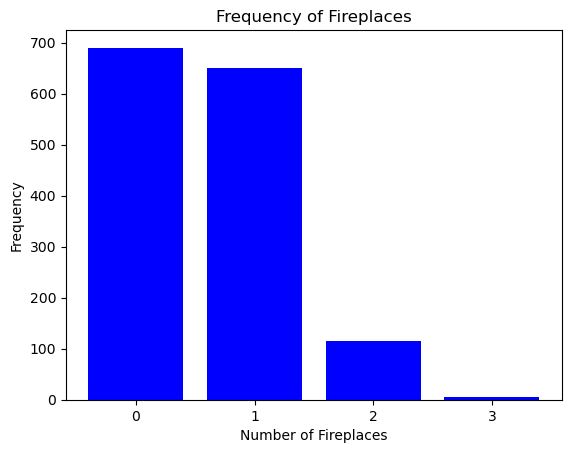

In [352]:
plt.bar(fireplace_counts.index, fireplace_counts.values, color='blue')
plt.title('Frequency of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Frequency')
plt.xticks(fireplace_counts.index)
plt.show()

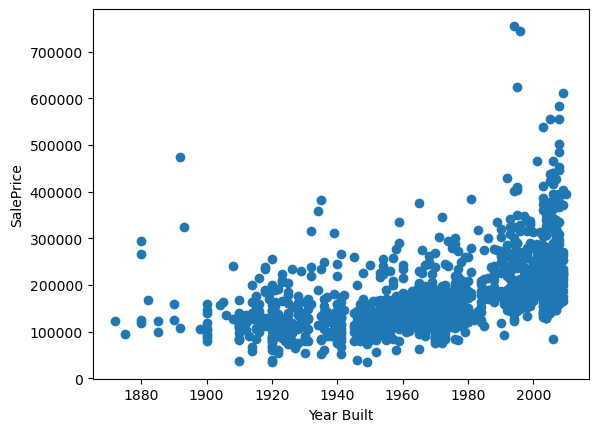

In [353]:
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x17c3ab010>,
 'caps': [<matplotlib.lines.Line2D at 0x17c3b4390>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c283890>],
 'medians': [<matplotlib.lines.Line2D at 0x17c3b5350>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c3a8590>],
 'means': []}

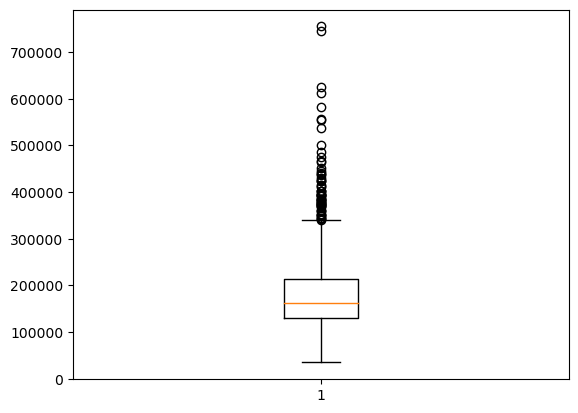

In [354]:
plt.boxplot(df.SalePrice)

{'whiskers': [<matplotlib.lines.Line2D at 0x17c336f10>,
 'caps': [<matplotlib.lines.Line2D at 0x17c2ff1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c3582d0>],
 'medians': [<matplotlib.lines.Line2D at 0x17c2fd250>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c34d590>],
 'means': []}

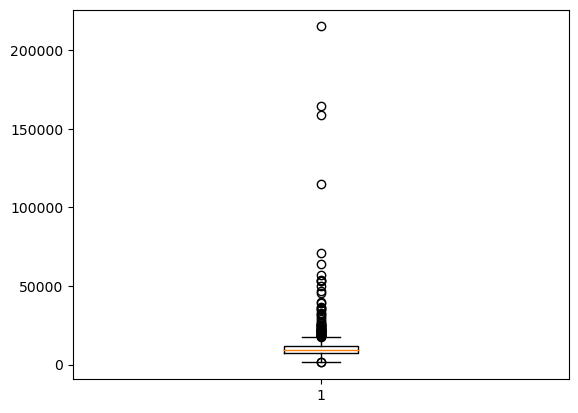

In [361]:
plt.boxplot(df.LotArea)

Categorical Variable Visualizations

In [301]:
electrical_counts=df.Electrical.value_counts()

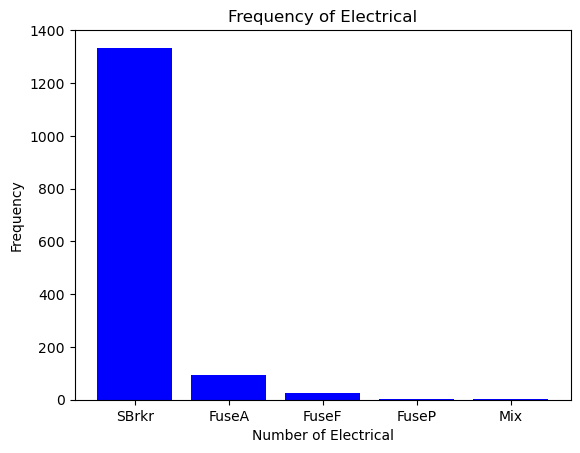

In [302]:
plt.bar(electrical_counts.index, electrical_counts.values, color='blue')
plt.title('Frequency of Electrical')
plt.xlabel('Number of Electrical')
plt.ylabel('Frequency')
plt.xticks(electrical_counts.index)
plt.show()

In [303]:
housestyle_counts=df.HouseStyle.value_counts()

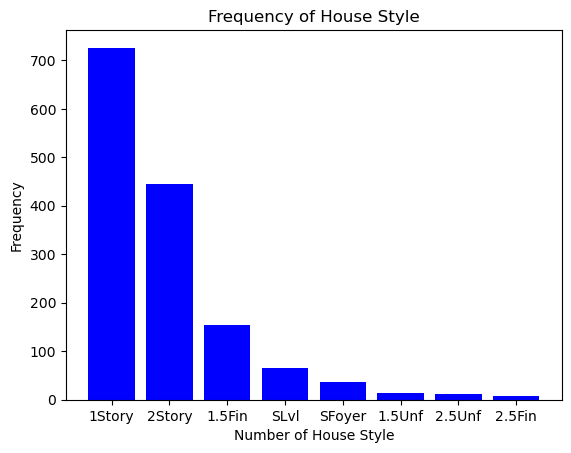

In [304]:
plt.bar(housestyle_counts.index, housestyle_counts.values, color='blue')
plt.title('Frequency of House Style')
plt.xlabel('Number of House Style')
plt.ylabel('Frequency')
plt.xticks(housestyle_counts.index)
plt.show()

# Part 2: Pre Processing

In [305]:
df_preprocessed=df.copy()

Handling Outliers

In [357]:
## IQR = 21, Outliers: values > (1.5*21)+80 and values < 59-(1.5*21)
dqr_numerical.loc[dqr_numerical.index=='LotFrontage']

,Count,% Missing Values,Cardinality,Minimum,1st Quartile,Mean,Median,3rd Quartile,Maximum,Standard Deviation
LotFrontage,1201,17.74,110,21.0,59.0,70.05,69.0,80.0,313.0,24.28


In [358]:
mean_lotfrontage = df_preprocessed['LotFrontage'].mean()

In [367]:
# Fill Outliers with mean of the dataset
df_preprocessed.loc[(df.LotFrontage > 111.5) | (df.LotFrontage < 27.5), 'LotFrontage'] = mean_lotfrontage

Handling Missing Values

In [309]:
null_value_count=df_preprocessed.isnull().sum()

In [310]:
#Columns with missing values
null_value_count.loc[null_value_count.values>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [311]:
## Percentage of Missing Values in each column
null_values.loc[null_values.values>0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [312]:
#Dropping MasVnrType and FireplaceQu because of no predictive power
df_preprocessed.drop(columns=['MasVnrType','FireplaceQu'],inplace=True)

In [313]:
## Columns to drop (null values > 60%)
null_values.loc[null_values.values>.6]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [314]:
df_preprocessed.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],inplace=True)

In [315]:
## Filling Numerical Columns with Missing Values: LotFrontage and MassVnrArea

In [316]:
## LotFrontage mean heavly influenced by outlier, so using median is more accurate
df_preprocessed.LotFrontage.fillna(df.LotFrontage.median(),inplace=True)

In [317]:
df_preprocessed.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)

In [318]:
## Filling Categorical Columns with Missing Values with the mode of each column
missing_categorical=df_preprocessed[['GarageType','GarageCond','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtFinType1','BsmtQual','Electrical','BsmtExposure']]

In [319]:
for column in missing_categorical:
    mode_value = df[column].mode()[0]
    df_preprocessed[column].fillna(mode_value, inplace=True)

In [391]:
#Drop columns that have little to no predictive value
df_preprocessed.drop(columns=['Id', 'Utilities', 'Street', 'Condition2', 'LowQualFinSF', 
    'MiscVal', '3SsnPorch', 'MoSold', 'YrSold', 'LandSlope', 
    'RoofMatl', 'Functional', 'CentralAir', 'EnclosedPorch', 
    'ScreenPorch', 'OpenPorchSF_scaled', 'WoodDeckSF_scaled'
],inplace=True)

Encoding Categorical Variables

In [320]:
#Slicing for categorical variables
categorical_data=df_preprocessed.select_dtypes(include=['object'])
categorical_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [321]:
#Label encoding categorical Variables
for col in categorical_data.columns:
    df_preprocessed[col] = pd.factorize(df_preprocessed[col])[0]

Normalization

/var/folders/bz/4rvxq7_j71b8xpghvx_s2cgm0000gn/T/ipykernel_99067/3708244488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LotArea'])


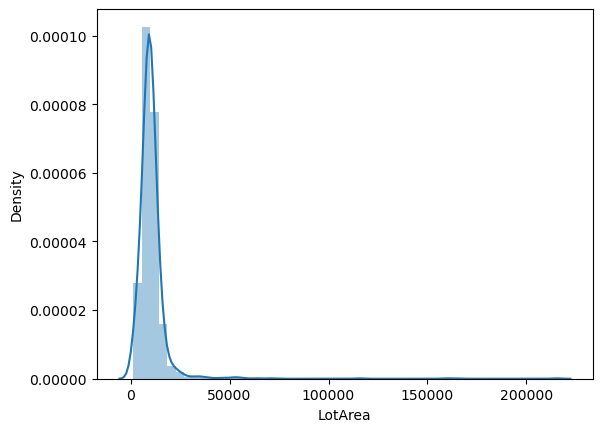

In [322]:
sns.distplot(df_preprocessed['LotArea'])
plt.show()

In [329]:
areas=df_preprocessed[['PoolArea','OpenPorchSF','WoodDeckSF','GarageArea','GrLivArea','2ndFlrSF','1stFlrSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','LotArea']]

In [330]:
# standardize the values of numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in areas.columns:
    df_preprocessed[col + "_scaled"] = scaler.fit_transform(df_preprocessed[[col]])

# Part 3: Post Processing

In [403]:
## Slice for 10 variables that offer most predictive value

df_postprocessed=df_preprocessed[['SalePrice','LotArea_scaled','OverallQual','OverallCond','GarageArea_scaled','1stFlrSF_scaled','2ndFlrSF_scaled','BsmtUnfSF_scaled','LotFrontage','TotRmsAbvGrd']]

In [404]:
df_postprocessed.corr()

,SalePrice,LotArea_scaled,OverallQual,OverallCond,GarageArea_scaled,1stFlrSF_scaled,2ndFlrSF_scaled,BsmtUnfSF_scaled,LotFrontage,TotRmsAbvGrd
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.623431,0.605852,0.319334,0.214479,0.334897,0.533723
LotArea_scaled,0.263843,1.000000,0.105806,-0.005636,0.180403,0.299475,0.050986,-0.002618,0.306689,0.190015
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.562022,0.476224,0.295493,0.308159,0.234227,0.427452
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.151521,-0.144203,0.028942,-0.136841,-0.052842,-0.057583
GarageArea_scaled,0.623431,0.180403,0.562022,-0.151521,1.000000,0.489782,0.138347,0.183303,0.323658,0.337822
1stFlrSF_scaled,0.605852,0.299475,0.476224,-0.144203,0.489782,1.000000,-0.202646,0.317987,0.414246,0.409516
2ndFlrSF_scaled,0.319334,0.050986,0.295493,0.028942,0.138347,-0.202646,1.000000,0.004469,0.072479,0.616423
BsmtUnfSF_scaled,0.214479,-0.002618,0.308159,-0.136841,0.183303,0.317987,0.004469,1.000000,0.122249,0.250647
LotFrontage,0.334897,0.306689,0.234227,-0.052842,0.323658,0.414246,0.072479,0.122249,1.000000,0.320166
TotRmsAbvGrd,0.533723,0.190015,0.427452,-0.057583,0.337822,0.409516,0.616423,0.250647,0.320166,1.000000


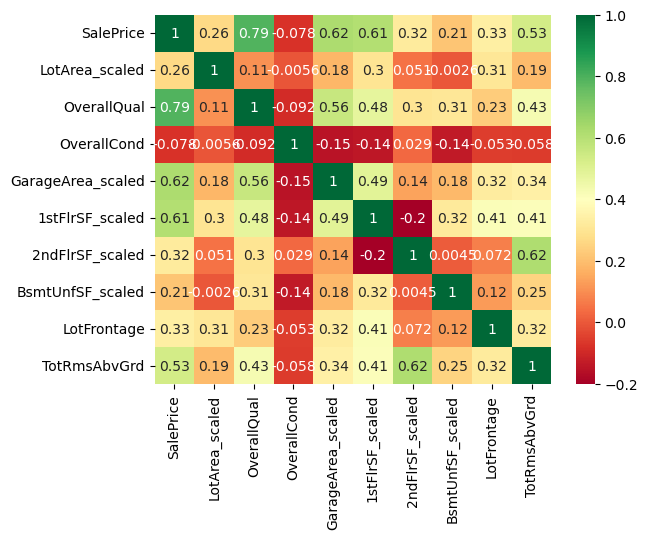

In [405]:
sns.heatmap(df_postprocessed.corr(), cmap='RdYlGn', annot=True)
plt.show()